--- Evaluando Modelo Base (Default) ---
R2 Base: -0.3878
RMSE Base: 25462.96

--- Iniciando Optimización (GridSearchCV) ---
Mejores Hiperparámetros encontrados: {'max_depth': 10, 'min_samples_split': 5, 'n_estimators': 200}
R2 Optimizado: -0.3126
RMSE Optimizado: 24763.21


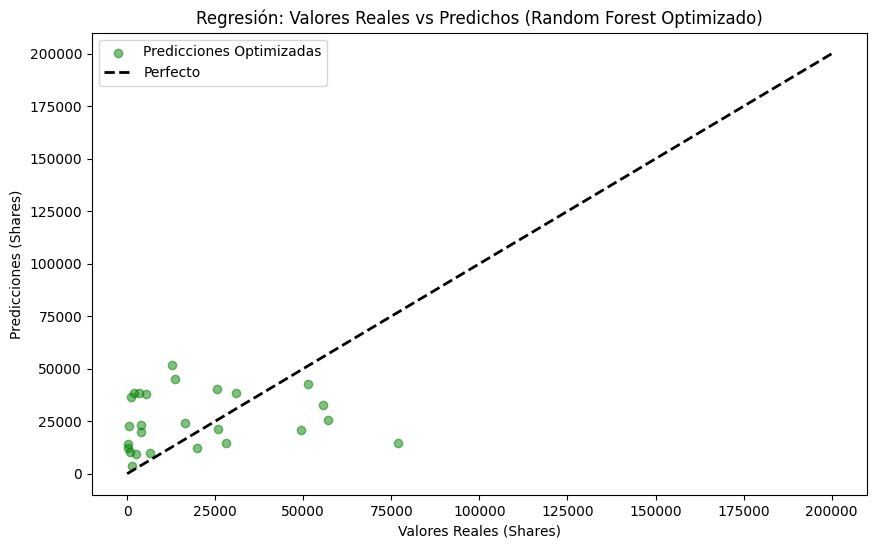

In [8]:
# PARTE 1

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error

# ---------------------------------------------------------
# 1. PREPARACIÓN DE DATOS
# ---------------------------------------------------------
df = pd.read_csv('articulos_ml.csv')

# Limpieza: eliminar columnas no predictivas (texto/links) y nulos
df_clean = df.drop(['Title', 'url'], axis=1).dropna()

# Selección de features y target
X = df_clean[['Word count', '# of Links', '# of comments', '# Images video', 'Elapsed days']]
y = df_clean['# Shares']

# Split 80/20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ---------------------------------------------------------
# 2. MODELO BASE (Sin Hiperparámetros)
# ---------------------------------------------------------
print("--- Evaluando Modelo Base (Default) ---")
base_rf = RandomForestRegressor(random_state=42) # Sin tunear nada
base_rf.fit(X_train, y_train)
y_pred_base = base_rf.predict(X_test)

# Evaluación Base
r2_base = r2_score(y_test, y_pred_base)
rmse_base = np.sqrt(mean_squared_error(y_test, y_pred_base))
print(f"R2 Base: {r2_base:.4f}")
print(f"RMSE Base: {rmse_base:.2f}\n")

# ---------------------------------------------------------
# 3. OPTIMIZACIÓN (Búsqueda de Hiperparámetros)
# ---------------------------------------------------------
print("--- Iniciando Optimización (GridSearchCV) ---")
# Definimos la rejilla de parámetros a probar
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5]
}

grid_search = GridSearchCV(estimator=RandomForestRegressor(random_state=42),
                           param_grid=param_grid,
                           cv=3, # Validación cruzada de 3 pliegues
                           n_jobs=-1, # Usar todos los procesadores
                           scoring='r2')

grid_search.fit(X_train, y_train)
print(f"Mejores Hiperparámetros encontrados: {grid_search.best_params_}")

# ---------------------------------------------------------
# 4. MODELO FINAL Y GRÁFICAS
# ---------------------------------------------------------
best_rf = grid_search.best_estimator_
y_pred_opt = best_rf.predict(X_test)

print(f"R2 Optimizado: {r2_score(y_test, y_pred_opt):.4f}")
print(f"RMSE Optimizado: {np.sqrt(mean_squared_error(y_test, y_pred_opt)):.2f}")

# Gráfica Comparativa: Real vs Predicho
plt.figure(figsize=(10,6))
plt.scatter(y_test, y_pred_opt, alpha=0.5, color='green', label='Predicciones Optimizadas')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2, label='Perfecto')
plt.xlabel('Valores Reales (Shares)')
plt.ylabel('Predicciones (Shares)')
plt.title('Regresión: Valores Reales vs Predichos (Random Forest Optimizado)')
plt.legend()
plt.show()

--- Evaluando Modelo Base (Default) ---
R2 Base: -0.3878
RMSE Base: 25462.96

--- Iniciando Optimización (GridSearchCV) ---
Mejores Hiperparámetros encontrados: {'max_depth': 10, 'min_samples_split': 5, 'n_estimators': 200}
R2 Optimizado: -0.3126
RMSE Optimizado: 24763.21


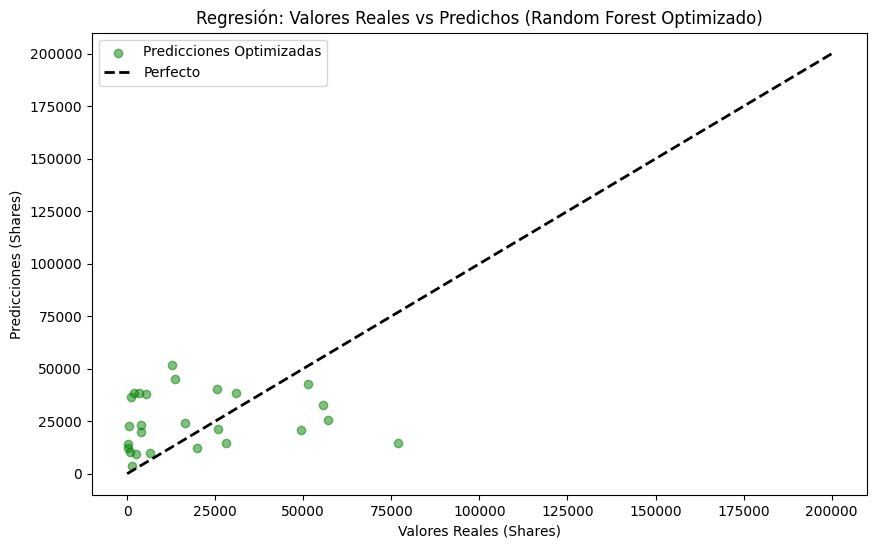

In [8]:
# PARTE 1

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error

# ---------------------------------------------------------
# 1. PREPARACIÓN DE DATOS
# ---------------------------------------------------------
df = pd.read_csv('articulos_ml.csv')

# Limpieza: eliminar columnas no predictivas (texto/links) y nulos
df_clean = df.drop(['Title', 'url'], axis=1).dropna()

# Selección de features y target
X = df_clean[['Word count', '# of Links', '# of comments', '# Images video', 'Elapsed days']]
y = df_clean['# Shares']

# Split 80/20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ---------------------------------------------------------
# 2. MODELO BASE (Sin Hiperparámetros)
# ---------------------------------------------------------
print("--- Evaluando Modelo Base (Default) ---")
base_rf = RandomForestRegressor(random_state=42) # Sin tunear nada
base_rf.fit(X_train, y_train)
y_pred_base = base_rf.predict(X_test)

# Evaluación Base
r2_base = r2_score(y_test, y_pred_base)
rmse_base = np.sqrt(mean_squared_error(y_test, y_pred_base))
print(f"R2 Base: {r2_base:.4f}")
print(f"RMSE Base: {rmse_base:.2f}\n")

# ---------------------------------------------------------
# 3. OPTIMIZACIÓN (Búsqueda de Hiperparámetros)
# ---------------------------------------------------------
print("--- Iniciando Optimización (GridSearchCV) ---")
# Definimos la rejilla de parámetros a probar
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5]
}

grid_search = GridSearchCV(estimator=RandomForestRegressor(random_state=42),
                           param_grid=param_grid,
                           cv=3, # Validación cruzada de 3 pliegues
                           n_jobs=-1, # Usar todos los procesadores
                           scoring='r2')

grid_search.fit(X_train, y_train)
print(f"Mejores Hiperparámetros encontrados: {grid_search.best_params_}")

# ---------------------------------------------------------
# 4. MODELO FINAL Y GRÁFICAS
# ---------------------------------------------------------
best_rf = grid_search.best_estimator_
y_pred_opt = best_rf.predict(X_test)

print(f"R2 Optimizado: {r2_score(y_test, y_pred_opt):.4f}")
print(f"RMSE Optimizado: {np.sqrt(mean_squared_error(y_test, y_pred_opt)):.2f}")

# Gráfica Comparativa: Real vs Predicho
plt.figure(figsize=(10,6))
plt.scatter(y_test, y_pred_opt, alpha=0.5, color='green', label='Predicciones Optimizadas')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2, label='Perfecto')
plt.xlabel('Valores Reales (Shares)')
plt.ylabel('Predicciones (Shares)')
plt.title('Regresión: Valores Reales vs Predichos (Random Forest Optimizado)')
plt.legend()
plt.show()

--- Evaluando Modelo Base ---
Accuracy Base: 0.7468

--- Buscando Hiperparámetros ---
Mejores parámetros: {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 10}

Reporte Clasificación Optimizado:
               precision    recall  f1-score   support

           0       0.82      0.85      0.83        99
           1       0.71      0.65      0.68        55

    accuracy                           0.78       154
   macro avg       0.76      0.75      0.76       154
weighted avg       0.78      0.78      0.78       154



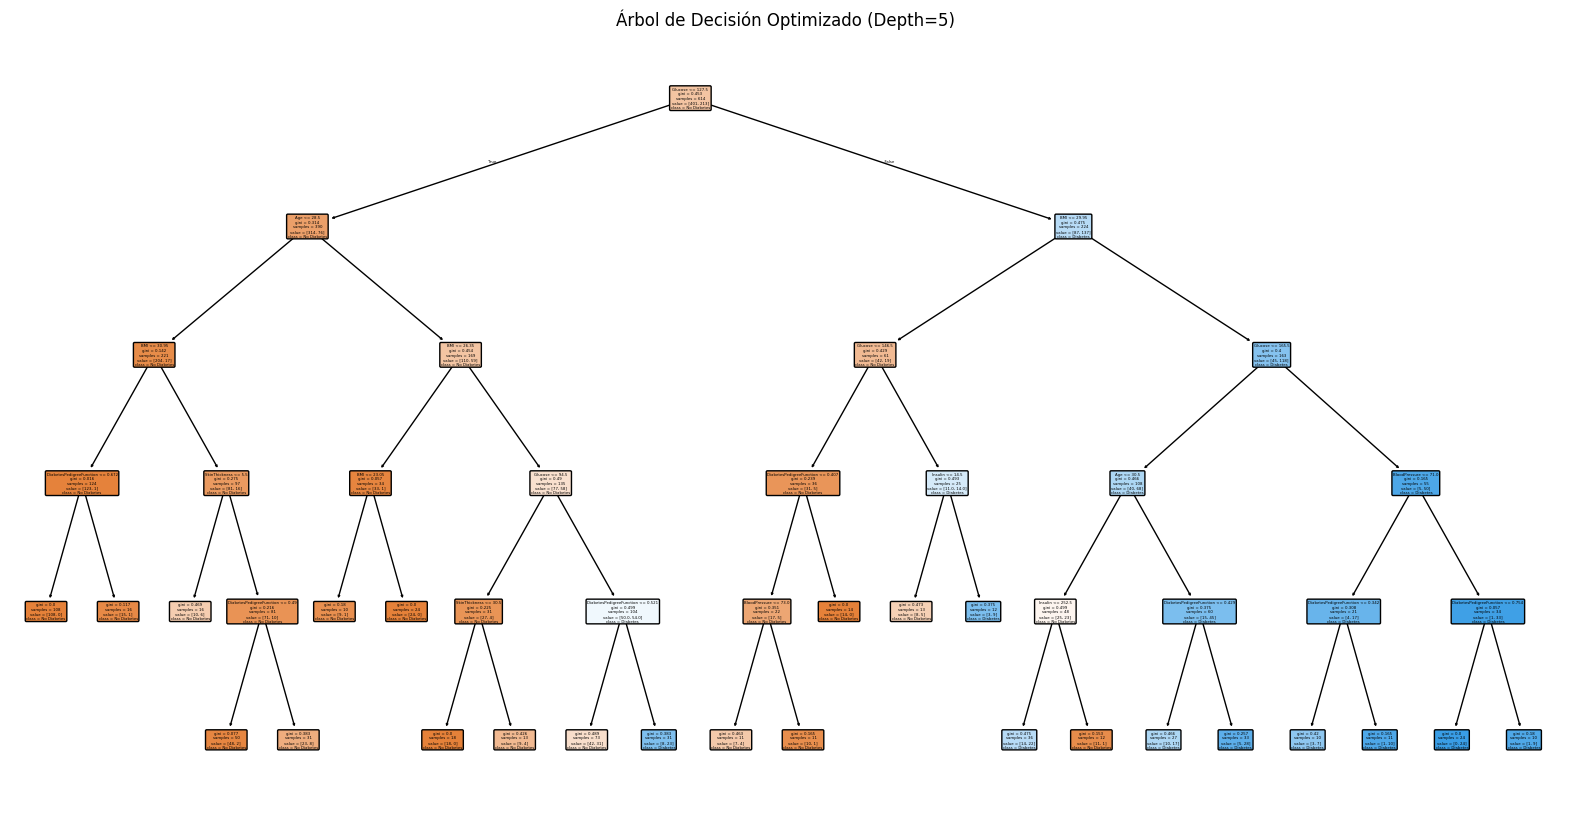

In [9]:
# PARTE 2

from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# ---------------------------------------------------------
# 1. PREPARACIÓN
# ---------------------------------------------------------
df_diabetes = pd.read_csv('diabetes.csv')
X = df_diabetes.drop('Outcome', axis=1)
y = df_diabetes['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ---------------------------------------------------------
# 2. MODELO BASE (Default)
# ---------------------------------------------------------
print("--- Evaluando Modelo Base ---")
base_tree = DecisionTreeClassifier(random_state=42) # Crecerá hasta que las hojas sean puras
base_tree.fit(X_train, y_train)
y_pred_base = base_tree.predict(X_test)

print(f"Accuracy Base: {accuracy_score(y_test, y_pred_base):.4f}")

# ---------------------------------------------------------
# 3. OPTIMIZACIÓN
# ---------------------------------------------------------
print("\n--- Buscando Hiperparámetros ---")
param_grid_tree = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [3, 5, 10, None], # Controlar profundidad es clave para evitar overfitting
    'min_samples_leaf': [1, 5, 10]
}

grid_tree = GridSearchCV(DecisionTreeClassifier(random_state=42),
                         param_grid=param_grid_tree,
                         cv=5,
                         scoring='accuracy')

grid_tree.fit(X_train, y_train)
print(f"Mejores parámetros: {grid_tree.best_params_}")

# ---------------------------------------------------------
# 4. RESULTADOS Y GRÁFICA
# ---------------------------------------------------------
best_tree = grid_tree.best_estimator_
y_pred_opt = best_tree.predict(X_test)

print("\nReporte Clasificación Optimizado:\n", classification_report(y_test, y_pred_opt))

# Gráfica del Árbol Optimizado
plt.figure(figsize=(20,10))
plot_tree(best_tree, feature_names=X.columns, class_names=['No Diabetes', 'Diabetes'], filled=True, rounded=True)
plt.title(f'Árbol de Decisión Optimizado (Depth={best_tree.max_depth})')
plt.show()

--- Modelo Inicial (K=3) ---
Inercia (WCSS) Base: 106348.37
Silhouette Score Base: 0.4676

--- Optimizando (Buscando K óptimo) ---


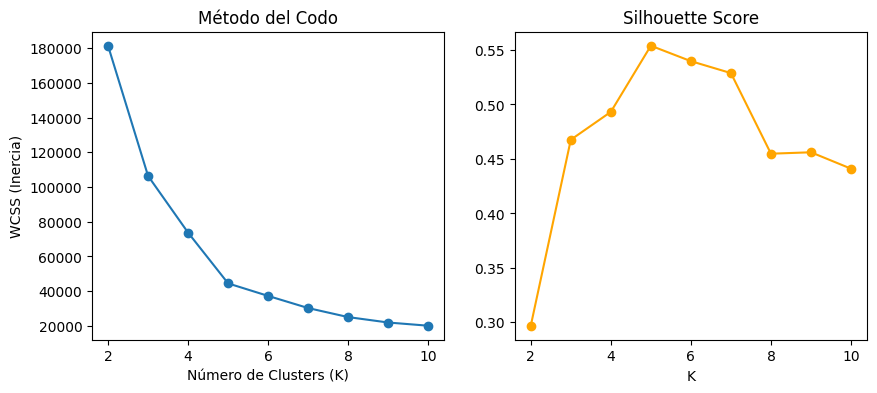

Basado en el codo y silhouette, elegimos K=5


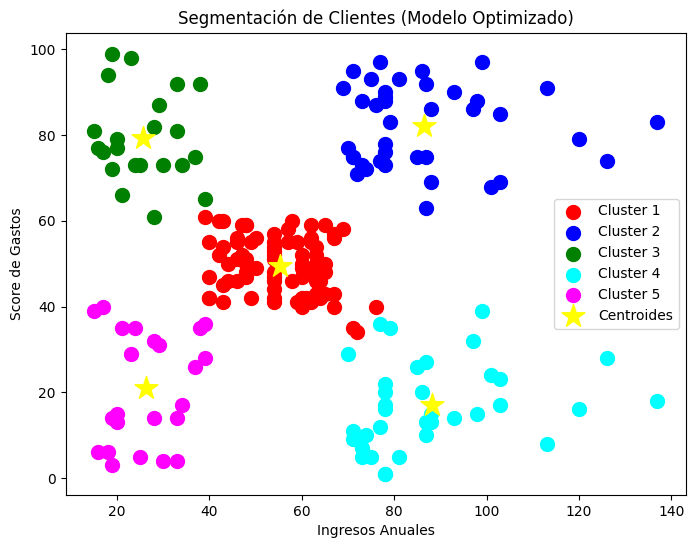

In [10]:
# PARTE 3

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# ---------------------------------------------------------
# 1. PREPARACIÓN
# ---------------------------------------------------------
df_store = pd.read_csv('cliente_tienda.csv')
# Usaremos Ingresos (col 3) y Puntuación Gastos (col 4)
X_cluster = df_store.iloc[:, [3, 4]].values

# ---------------------------------------------------------
# 2. MODELO INICIAL (K Arbitrario, ej: 3)
# ---------------------------------------------------------
print("--- Modelo Inicial (K=3) ---")
kmeans_base = KMeans(n_clusters=3, init='k-means++', random_state=42, n_init=10)
labels_base = kmeans_base.fit_predict(X_cluster)
print(f"Inercia (WCSS) Base: {kmeans_base.inertia_:.2f}")
print(f"Silhouette Score Base: {silhouette_score(X_cluster, labels_base):.4f}")

# ---------------------------------------------------------
# 3. OPTIMIZACIÓN (Búsqueda del K óptimo - Método del Codo)
# ---------------------------------------------------------
print("\n--- Optimizando (Buscando K óptimo) ---")
wcss = []
silhouette_scores = []
K_range = range(2, 11)

for i in K_range:
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42, n_init=10)
    kmeans.fit(X_cluster)
    wcss.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X_cluster, kmeans.labels_))

# Gráfica del Codo
plt.figure(figsize=(10,4))
plt.subplot(1, 2, 1)
plt.plot(K_range, wcss, marker='o')
plt.title('Método del Codo')
plt.xlabel('Número de Clusters (K)')
plt.ylabel('WCSS (Inercia)')

plt.subplot(1, 2, 2)
plt.plot(K_range, silhouette_scores, marker='o', color='orange')
plt.title('Silhouette Score')
plt.xlabel('K')
plt.show()

print("Basado en el codo y silhouette, elegimos K=5")

# ---------------------------------------------------------
# 4. MODELO FINAL (K=5)
# ---------------------------------------------------------
kmeans_final = KMeans(n_clusters=5, init='k-means++', random_state=42, n_init=10)
y_kmeans = kmeans_final.fit_predict(X_cluster)

# Gráfica Final
plt.figure(figsize=(8,6))
colors = ['red', 'blue', 'green', 'cyan', 'magenta']
for i in range(5):
    plt.scatter(X_cluster[y_kmeans == i, 0], X_cluster[y_kmeans == i, 1], 
                s=100, c=colors[i], label=f'Cluster {i+1}')

plt.scatter(kmeans_final.cluster_centers_[:, 0], kmeans_final.cluster_centers_[:, 1], 
            s=300, c='yellow', marker='*', label='Centroides')
plt.title('Segmentación de Clientes (Modelo Optimizado)')
plt.xlabel('Ingresos Anuales')
plt.ylabel('Score de Gastos')
plt.legend()
plt.show()

Varianza explicada por cada componente: [0.72770452 0.23030523 0.03683832 0.00515193]
Varianza acumulada: [0.72770452 0.95800975 0.99484807 1.        ]


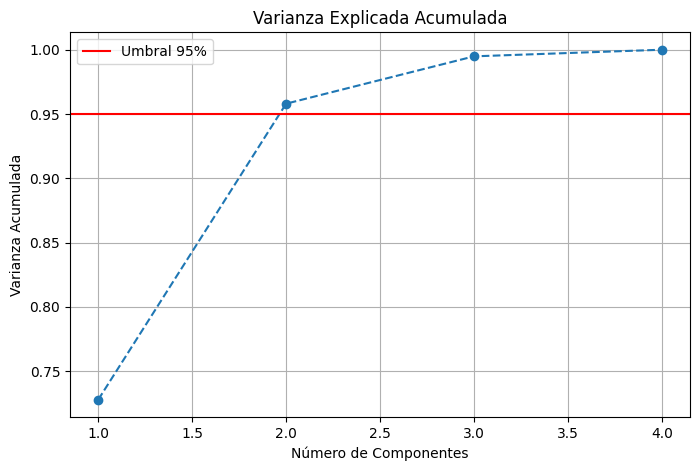

Justificación: Con 2 componentes explicamos aprox el 95% de la información y permite visualización 2D.


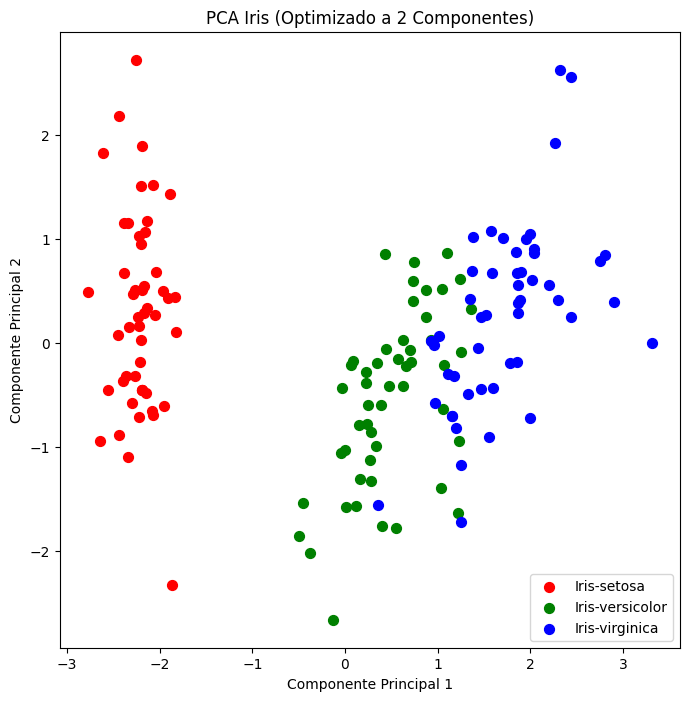

In [11]:
# PARTE 4

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# ---------------------------------------------------------
# 1. PREPARACIÓN
# ---------------------------------------------------------
df_iris = pd.read_csv('Iris.csv')
X_iris = df_iris.drop(['Id', 'species'], axis=1)
y_iris = df_iris['species']

# Estandarización (Obligatorio para PCA)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_iris)

# ---------------------------------------------------------
# 2. MODELO INICIAL (Full Components)
# ---------------------------------------------------------
# Iris tiene 4 features, así que creamos 4 componentes para evaluar
pca_full = PCA(n_components=None) 
pca_full.fit(X_scaled)

# ---------------------------------------------------------
# 3. EVALUACIÓN Y SELECCIÓN (Optimización)
# ---------------------------------------------------------
variance_ratio = pca_full.explained_variance_ratio_
cumulative_variance = np.cumsum(variance_ratio)

print("Varianza explicada por cada componente:", variance_ratio)
print("Varianza acumulada:", cumulative_variance)

# Gráfica de Varianza Acumulada para justificar la elección
plt.figure(figsize=(8,5))
plt.plot(range(1, len(cumulative_variance)+1), cumulative_variance, marker='o', linestyle='--')
plt.axhline(y=0.95, color='r', linestyle='-', label='Umbral 95%')
plt.title('Varianza Explicada Acumulada')
plt.xlabel('Número de Componentes')
plt.ylabel('Varianza Acumulada')
plt.legend()
plt.grid()
plt.show()

print("Justificación: Con 2 componentes explicamos aprox el 95% de la información y permite visualización 2D.")

# ---------------------------------------------------------
# 4. MODELO FINAL (Reducción a 2 componentes)
# ---------------------------------------------------------
pca_final = PCA(n_components=2)
principalComponents = pca_final.fit_transform(X_scaled)

# DataFrame Final para Graficar
finalDf = pd.DataFrame(data=principalComponents, columns=['PC1', 'PC2'])
finalDf = pd.concat([finalDf, df_iris[['species']]], axis=1)

# Gráfica 2D
plt.figure(figsize=(8,8))
targets = df_iris['species'].unique()
colors = ['r', 'g', 'b']
for target, color in zip(targets, colors):
    indices = finalDf['species'] == target
    plt.scatter(finalDf.loc[indices, 'PC1'], finalDf.loc[indices, 'PC2'], c=color, s=50)
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.title('PCA Iris (Optimizado a 2 Componentes)')
plt.legend(targets)
plt.show()